In [1]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, get_data_exfiltration_cdf
from statistics import mean
import seaborn as sns

import pandas as pd

In [2]:
# Baseline attacker
dfs_standalone_d0_h0 = ingest_experiment_results(path.join('data/Standalone/Ring/dfs_standalone_d0_h0'))
dfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/Standalone/Ring/dfs_standalone_d10_h50'))
dfs_layered_d10_h50 = ingest_experiment_results(path.join('data/Layered/Ring/dfs_layered_d10_h50'))
dfs_tarpit_d10_h50 = ingest_experiment_results(path.join('data/Tarpit/Ring/dfs_tarpit_d10_h100'))

In [3]:
dfs_standalone_d0_h0_times = get_data_exfiltration_times(dfs_standalone_d0_h0, expected_files=25)
dfs_standalone_d10_h50_times = get_data_exfiltration_times(dfs_standalone_d10_h50, expected_files=25)
dfs_layered_d10_h50_times = get_data_exfiltration_times(dfs_layered_d10_h50, expected_files=25)
dfs_tarpit_d10_h50_times = get_data_exfiltration_times(dfs_tarpit_d10_h50, expected_files=25)

In [6]:
# merge dicts
all_data = {}
all_data.update()
all_data.update()
all_data.update(dfs_layered_d10_h50)
all_data.update(dfs_tarpit_d10_h50)

baseline_cdf = get_data_exfiltration_cdf(all_data, 25)

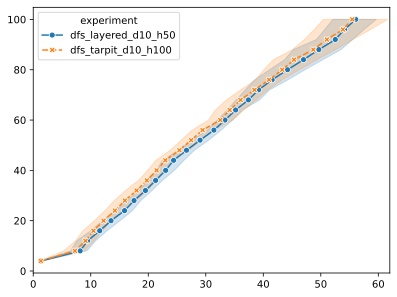

In [7]:
ax = sns.lineplot(data=baseline_cdf, 
             x="time_exfiltrated", y="percent_data", hue="experiment",
             style="experiment", markers=True, dashes=True, legend=True, orient="y")
# Remove x-axis label
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xlim(0, 62)

# Save as svg
plt = ax.get_figure()
plt.savefig('./plots/layered_exfil.svg', transparent=True)

In [14]:
# Print the mean time to exfiltrate
print("Mean time to exfiltrate: ")
print("Standalone: ", mean(dfs_standalone_d0_h0_times['time_exfiltrated']))
print("Standalone: ", mean(dfs_standalone_d10_h50_times['time_exfiltrated']))
print("% Increase: ", (mean(dfs_standalone_d10_h50_times['time_exfiltrated']) / mean(dfs_standalone_d0_h0_times['time_exfiltrated']) - 1) * 100)
print("Layered: ", mean(dfs_layered_d10_h50_times['time_exfiltrated']))
print("% Increase: ", (mean(dfs_layered_d10_h50_times['time_exfiltrated']) / mean(dfs_standalone_d0_h0_times['time_exfiltrated']) - 1) * 100)
print("% Increase: ", (mean(dfs_layered_d10_h50_times['time_exfiltrated']) / mean(dfs_standalone_d10_h50_times['time_exfiltrated']) - 1) * 100)

Mean time to exfiltrate: 
Standalone:  29.674786252975466
Standalone:  32.128495636781054
% Increase:  8.268667423205311
Layered:  56.46613931457202
% Increase:  90.28322169939878
% Increase:  75.75095937554251


In [12]:
test = get_data_exfiltration_cdf(dfs_layered_d10_h50, 25)
test

,experiment,experiment_num,time_exfiltrated,file_number,percent_data
0,dfs_layered_d10_h50,0,1.202209,1,4.0
1,dfs_layered_d10_h50,1,1.282553,1,4.0
2,dfs_layered_d10_h50,1,8.099219,2,8.0
3,dfs_layered_d10_h50,1,10.715886,3,12.0
4,dfs_layered_d10_h50,1,14.382553,4,16.0
...,...,...,...,...,...
221,dfs_layered_d10_h50,9,48.629686,21,84.0
222,dfs_layered_d10_h50,9,49.513019,22,88.0
223,dfs_layered_d10_h50,9,51.679686,23,92.0
224,dfs_layered_d10_h50,9,54.029686,24,96.0


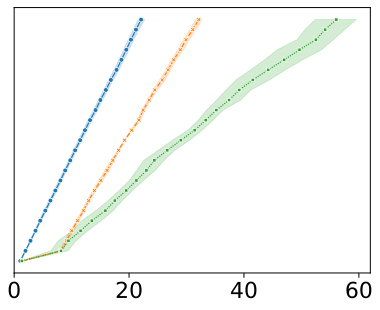

In [16]:
sns.set_context("paper", font_scale=2.5)
# layered plot
# merge dicts
all_data = {}
all_data.update(dfs_standalone_d0_h0)
all_data.update(dfs_standalone_d10_h50)
all_data.update(dfs_layered_d10_h50)

baseline_cdf = get_data_exfiltration_cdf(all_data, 25)

ax = sns.lineplot(data=baseline_cdf, 
             x="time_exfiltrated", y="percent_data", hue="experiment",
             style="experiment", markers=True, dashes=True, legend=False, orient="y")
# Remove x-axis label
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xlim(0, 62)
# Hide y axis ticks
ax.yaxis.set_ticks([])

# Save as svg
plt = ax.get_figure()
plt.savefig('./plots/ring_layered.svg', transparent=True)